<a href="https://colab.research.google.com/github/threaded-panda/my-py/blob/main/titanic_logistic_regression_and_xgbclassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**An exercise to demonstrate how to use Python to perform various tasks, including EDA, cleaning, visualizations, regressive analysis, confusion matrix, and XGBClassifier construction, fitting and evaluating.**

Data Source: https://www.kaggle.com/c/titanic,

# TASK #1: IMPORT LIBRARIES AND DATASETS

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Read the data using pandas dataframe
test_df = pd.read_csv('/kaggle/input/titanic/test.csv')
train_df = pd.read_csv('/kaggle/input/titanic/train.csv')
print(test_df.shape)
print(train_df.shape)
#test data has one less row, 'Survived', because these datasets are meant for the Titanic Competition.
#The test data is missing that row because it is the value you are trying to predict.

(418, 11)
(891, 12)


In [ ]:
# Show the first few lines of data

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## **PERFORM DATA EDA and Visualization**

In [ ]:
# Let's count the number of survivors and non-survivors in the train data.
print(train_df['Survived'].value_counts())

Survived
0    549
1    342
Name: count, dtype: int64


In [ ]:
survived_df=train_df[train_df['Survived'] == 1]
died_df=train_df[train_df['Survived'] == 0]

In [ ]:
# Count the number survived and those that did not survive in the train data.
print("Total =", len(train_df))

print("Number of passengers who survived =", len(survived_df))
print("Percentage Survived =", round(1.0 * len(survived_df) / len(train_df) * 100.0, 2), "%")

print("Number of passengers who did not Survive =", len(died_df))
print("Percentage who did not survive =", round(1. * len(died_df) / len(train_df) * 100.0, 2), "%")


Total = 891
Number of passengers who survived = 342
Percentage Survived = 38.38 %
Number of passengers who did not Survive = 549
Percentage who did not survive = 61.62 %


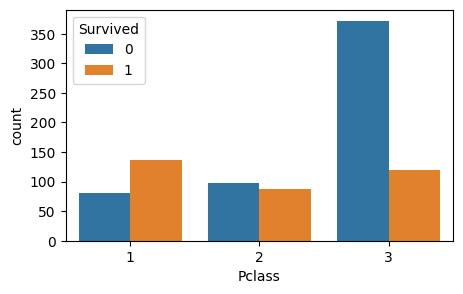

In [ ]:
# Bar Chart to indicate the number of people who survived based on their class.
# Those who travelled first class had a higher chance of survival.
plt.figure(figsize=(5, 3))
sns.countplot(x='Pclass', hue='Survived', data=train_df)
plt.show()


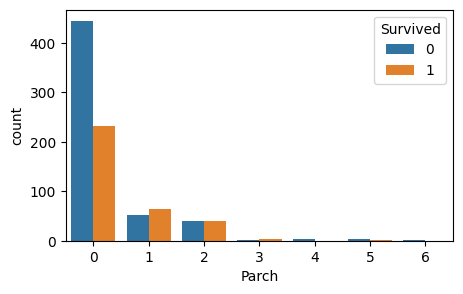

In [ ]:
# Bar Chart to indicate the number of people survived based on their Parch status
#(those there with parents or children)
plt.figure(figsize = (5, 3))

sns.countplot(x = 'Parch', hue = 'Survived', data = train_df)

plt.show()

<Axes: xlabel='Sex', ylabel='count'>

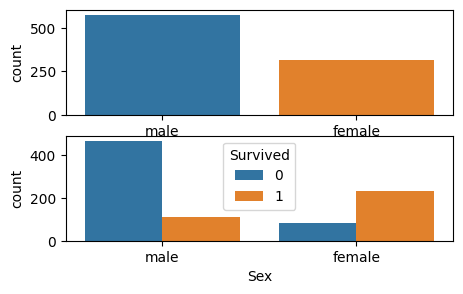

In [ ]:
# Bar Chart to indicate the number of people survived based on their gender.
# Females had a higher chance of survival.
plt.figure(figsize = [5, 3])
plt.subplot(211)
sns.countplot(x = 'Sex', data = train_df)
plt.subplot(212)
sns.countplot(x = 'Sex', hue = 'Survived', data = train_df)

<Axes: xlabel='SibSp', ylabel='count'>

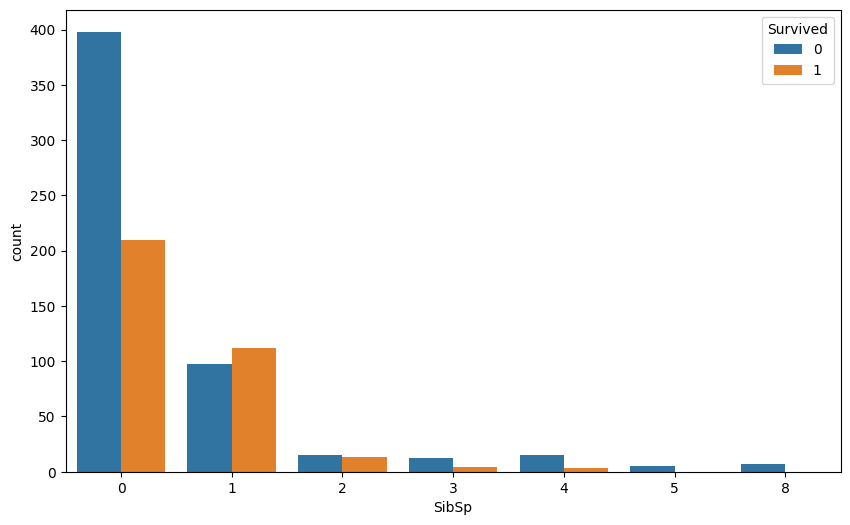

In [ ]:
# This shows how those without siblings on board were twice as likely to die, and roughly 25% more likely
#to live if there was one sibling.  However, 2 or more siblings didn't make much of a difference.

plt.figure(figsize = [10, 6])

sns.countplot(x = 'SibSp', hue = 'Survived', data = train_df)

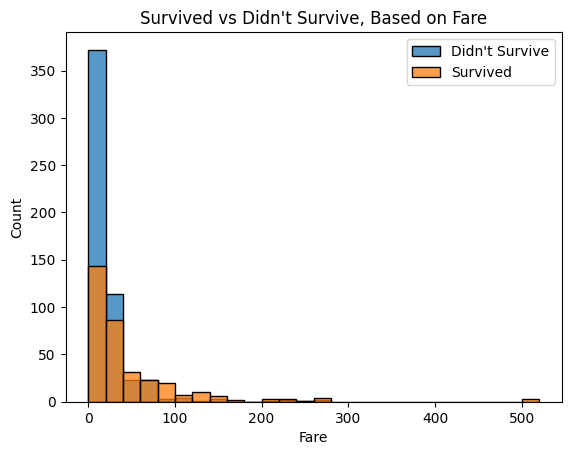

In [ ]:
#A histogram from Seaborn to compare survival based on fare.  Travellers who didn't pay a fare (staff) were
#much more likely to die.
# Bar Chart to indicate the number of people who survived based on their class.
# Those who travelled first class had a higher chance of survival.

#warning supression for tidy plot
import warnings

warnings.filterwarnings(
    'ignore',
    message=".*use_inf_as_na option is deprecated and will be removed in a future version.*",
    category=FutureWarning
)
sns.histplot(data=died_df, x='Fare', bins=10, binwidth=20, label="Didn't Survive", multiple='dodge')
sns.histplot(data=survived_df, x='Fare', bins=10, binwidth=20, label="Survived", multiple='dodge')
plt.title("Survived vs Didn't Survive, Based on Fare")
plt.legend()
plt.show()


**PERFORM DATA CLEANING AND FEATURE ENGINEERING**

<Axes: >

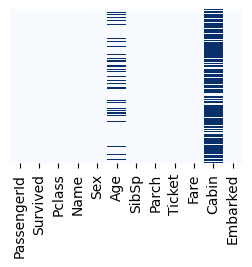

In [ ]:
# Let's explore which columns are missing data
plt.figure(figsize=(3,2))
sns.heatmap(train_df.isnull(), yticklabels = False, cbar = False, cmap="Blues")


In [ ]:
train_df

In [ ]:
# Drop the cabin column and unnecessary columns and test with inplace = true and false
train_df = train_df.drop(['Cabin','Name', 'Ticket','Embarked'], axis =1)


In [ ]:
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,male,22.0,1,0,7.2500
1,2,1,1,female,38.0,1,0,71.2833
2,3,1,3,female,26.0,0,0,7.9250
3,4,1,1,female,35.0,1,0,53.1000
4,5,0,3,male,35.0,0,0,8.0500


In [ ]:
#Repeat for test data
test_df.drop(['Cabin','Name', 'Ticket','Embarked'], axis =1, inplace = True)

<Axes: xlabel='Sex', ylabel='Age'>

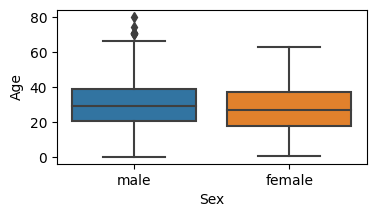

In [ ]:
# We need to deal with the missing values for age.
# Let's get the average age for male (~29) and female (~25)
plt.figure(figsize=(4, 2))
sns.boxplot(x = 'Sex', y = 'Age', data = train_df)

In [ ]:
age_fill = train_df.groupby(['Pclass'])['Age'].median()

def fill_age(row):
    if pd.isnull(row['Age']):
        median_age = age_fill.get((row['Pclass']), None)
        if median_age is None:
            # Fallback to median of just Pclass
            median_age = age_fill.get(('Missing', row['Pclass']), np.nan)
        if pd.isnull(median_age):
            # Fallback to overall median of Age if still NaN
            median_age = train_df['Age'].median()
        return median_age
    else:
        return row['Age']

train_df['Age'] = train_df.apply(fill_age, axis=1)
test_df['Age'] = test_df.apply(fill_age, axis=1)

In [ ]:
print(train_df.isna().sum())
print(test_df.isna().sum())

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
dtype: int64
PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           1
dtype: int64


In [ ]:
#fill in na value
test_df['Fare'] = test_df['Fare'].fillna(1)
test_df.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare
0,892,3,male,34.5,0,0,7.8292
1,893,3,female,47.0,1,0,7.0000
2,894,2,male,62.0,0,0,9.6875
3,895,3,male,27.0,0,0,8.6625
4,896,3,female,22.0,1,1,12.2875


In [ ]:
print(test_df.isna().sum())

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
dtype: int64


<Axes: >

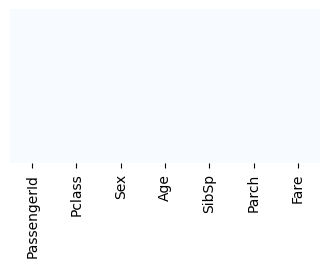

In [ ]:
# Let's view the data one more time!
plt.figure(figsize=(4,2))
sns.heatmap(test_df.isnull(), yticklabels = False, cbar = False, cmap="Blues")
#Success!  The heatmap is empty! (for both train_df and test_df)

In [ ]:
# One column is needed to represent male or female.  First, use pd.get_dummies to assign a 1 or 0, then
#drop #Sex_male
import pandas as pd
train_df = pd.get_dummies(train_df, columns=['Sex'], dtype=int)


In [ ]:
train_df = train_df.drop('Sex_male', axis=1)

In [ ]:
train_df

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female
0,1,0,3,22.0,1,0,7.2500,0
1,2,1,1,38.0,1,0,71.2833,1
2,3,1,3,26.0,0,0,7.9250,1
3,4,1,1,35.0,1,0,53.1000,1
4,5,0,3,35.0,0,0,8.0500,0
...,...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000,0
887,888,1,1,19.0,0,0,30.0000,1
888,889,0,3,24.0,1,2,23.4500,1
889,890,1,1,26.0,0,0,30.0000,0


In [ ]:
#repeat for test
test_df = pd.get_dummies(test_df, columns=['Sex'], dtype=int)

In [ ]:
#remove extra row, sex male.
test_df = test_df.drop('Sex_male', axis =1)
test_df

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_female
0,892,3,34.5,0,0,7.8292,0
1,893,3,47.0,1,0,7.0000,1
2,894,2,62.0,0,0,9.6875,0
3,895,3,27.0,0,0,8.6625,0
4,896,3,22.0,1,1,12.2875,1
...,...,...,...,...,...,...,...
413,1305,3,24.0,0,0,8.0500,0
414,1306,1,39.0,0,0,108.9000,1
415,1307,3,38.5,0,0,7.2500,0
416,1308,3,24.0,0,0,8.0500,0


In [ ]:
print(train_df.shape)
print(test_df.shape)

(891, 8)
(418, 7)


# TRAIN LOGISTIC REGRESSION CLASSIFIER MODEL

In [ ]:
#define train variables
#Define X predictor variables
x = train_df.copy()
y = train_df['Survived']
x = train_df.drop('Survived', axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X_train, X_val, y_train, y_val = train_test_split(x,y, test_size=0.3, random_state=42)

In [ ]:
print(X_train.shape)
print(X_val.shape)
print(y_train.shape)
print(y_val.shape)


(623, 7)
(268, 7)
(623,)
(268,)


### MODEL BUILDING

In [ ]:
#Build a logistic regression model and fit it to the data
clf = LogisticRegression(max_iter=1000).fit(X_train, y_train)

In [ ]:
#Obtain parameter estimates
clf.coef_

array([[ 2.73044404e-04, -9.66519284e-01, -3.75506267e-02,
        -2.93583205e-01, -1.15235447e-01,  3.55902957e-03,
         2.51309604e+00]])

In [ ]:
clf.intercept_

array([1.76158508])

In [ ]:
# save predictions
y_preds = clf.predict(X_val)

In [ ]:
clf.predict(X_val)

In [ ]:
#print out the predicted probabilities on each data point
clf.predict_proba(X_val)[::,-1]

array([0.09976084, 0.23540955, 0.16367293, 0.91014579, 0.64720196,
       0.93654882, 0.64191306, 0.1024136 , 0.70244374, 0.92380317,
       0.34046426, 0.07101258, 0.4258654 , 0.10230409, 0.20055835,
       0.950992  , 0.3276643 , 0.66381539, 0.28969565, 0.31985545,
       0.12669101, 0.43417445, 0.61033701, 0.15846899, 0.1370027 ,
       0.09099829, 0.35438127, 0.24876243, 0.09257229, 0.58598835,
       0.17028619, 0.64916349, 0.43333361, 0.63765888, 0.15068229,
       0.09757895, 0.46917585, 0.63548633, 0.92568006, 0.14075497,
       0.22225799, 0.08588614, 0.14409009, 0.1423842 , 0.43061747,
       0.09691557, 0.14138523, 0.13319884, 0.12384803, 0.26308739,
       0.66286906, 0.81811813, 0.03929172, 0.62346767, 0.03004785,
       0.94507317, 0.2114316 , 0.90705897, 0.76133192, 0.66862898,
       0.14341767, 0.87321631, 0.76954903, 0.38796008, 0.12370365,
       0.61056552, 0.33659712, 0.1107192 , 0.11775221, 0.8178937 ,
       0.75666937, 0.94446491, 0.54203304, 0.87643516, 0.14855

### ASSESS TRAINED MODEL PERFORMANCE

In [ ]:
#Import:
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
#trained model performance on its val(validation) data.
print('Accuracy', '%.3f' % accuracy_score(y_val, y_preds))
print('Precision:', '%.3f' % precision_score(y_val, y_preds))
print('Recall:', '%.3f' % recall_score(y_val, y_preds))
print('F1 Score:', '%.3f' % f1_score(y_val, y_preds))

Accuracy 0.817
Precision: 0.816
Recall: 0.721
F1 Score: 0.766


In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.

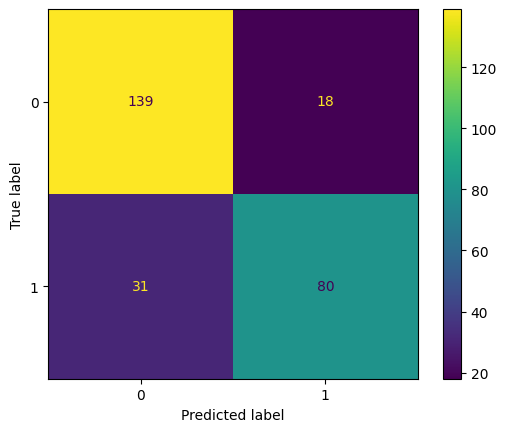

In [ ]:
#Create a confusion matrix for the training data.
import sklearn.metrics as metrics
cm = metrics.confusion_matrix(y_val, y_preds, labels=clf.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_,
                                 )
disp.plot()


In [ ]:
#X, test_df = X.align(test_df, join='inner', axis=0, fill_value=None)

In [ ]:
import xgboost as xgb
from xgboost import XGBClassifier
xgb = XGBClassifier(enable_categorical=True, tree_method='hist', use_label_encoder=False, random_state=0)

In [ ]:
#set param for XGboost
# Set parameters for XGBoost
cv_params = {'max_depth': [3],
    'learning_rate': [0.1],
    'n_estimators': [100],
}

In [ ]:
#define criteria as scoring
scoring = {'accuracy', 'precision', 'recall', 'f1'}

In [ ]:
#construct GridSearch
from sklearn.model_selection import GridSearchCV, train_test_split
xgb_cv = GridSearchCV(xgb, cv_params, scoring=scoring, cv=5, refit='f1')

In [ ]:
#fit GridSearch model to training data
xgb_cv.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=True, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, m...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=0, ...),
             param_grid={'learning_rate': [0.1], 'max_depth': [3],
                         'n_estimators': [100]},
             refit='f1', scoring={'f1', 'precision', 'recall', 'accuracy'})

In [ ]:
#apply model to predict on real test data
y_pred = xgb_cv.predict(test_df)

In [ ]:
y_pred.shape

(418,)

In [ ]:
# Assuming `test_cleaned` is your test data and you've made predictions
# Replace 'model.predict()' with the actual method you're using to get predictions
predictions = y_pred

# Create a DataFrame with the required columns
submission = pd.DataFrame({
    'PassengerId': test_df['PassengerId'],  # Use the original test data's PassengerId
    'Survived': predictions               # Your model's predictions
})

# Save the submission DataFrame to a CSV file
submission.to_csv('submission_titanic.csv', index=False)

print("Your submission was successfully saved")

Your submission was successfully saved
